In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

from torch.utils.data import Dataset, DataLoader
import torch
from utils import id_to_label

In [28]:
train_df = pd.read_csv('train.csv')
train_df

,image_path,label
0,train/n02769748/images/n02769748_0.JPEG,n02769748
1,train/n02769748/images/n02769748_1.JPEG,n02769748
2,train/n02769748/images/n02769748_10.JPEG,n02769748
3,train/n02769748/images/n02769748_100.JPEG,n02769748
4,train/n02769748/images/n02769748_101.JPEG,n02769748
...,...,...
24995,train/n03444034/images/n03444034_95.JPEG,n03444034
24996,train/n03444034/images/n03444034_96.JPEG,n03444034
24997,train/n03444034/images/n03444034_97.JPEG,n03444034
24998,train/n03444034/images/n03444034_98.JPEG,n03444034


In [29]:
from dataset import ComboDataset

train_dataset = ComboDataset(train_df)

In [30]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=1, pin_memory=True)
len(train_loader)

6250

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 3, 128, 128])
torch.Size([4, 3, 128, 128])
tensor([0.9900, 0.0100, 0.0100, 0.9900], dtype=torch.float64)
torch.Size([4])


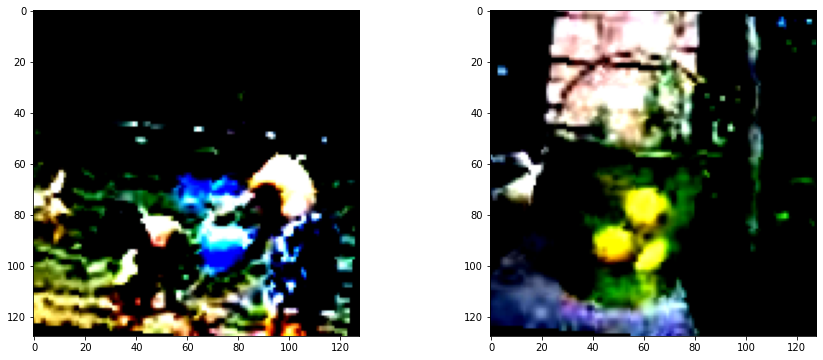

0.99


In [34]:
for im1, im2, label in train_loader:
    print(im1.shape)
    print(im2.shape)
    print(label)
    print(label.shape)

    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(im1[0].permute(1,2,0))
    plt.subplot(122)
    plt.imshow(im2[0].permute(1,2,0))
    plt.show()
    print((label[0].item()))
    break

In [17]:
id = 1
anchor, label = train_dataset[id]

print(anchor.shape)
# print(positive.shape)
print(label)

TypeError: Input tensor should be a float tensor. Got torch.uint8.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


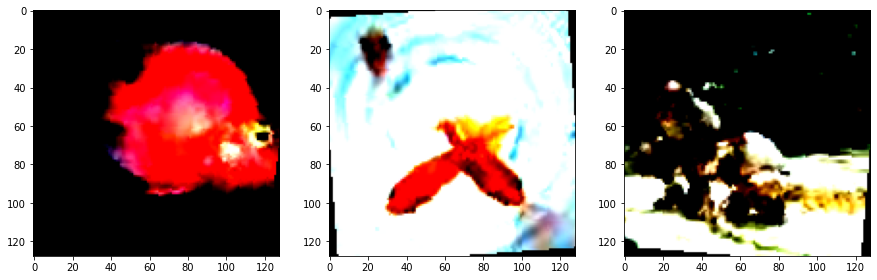

In [13]:
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.imshow(anchor.permute(1,2,0))
plt.subplot(132)
plt.imshow(positive.permute(1,2,0))
plt.subplot(133)
plt.imshow(negative.permute(1,2,0))
plt.show()

In [37]:
from models import ComboNet

model = ComboNet(50)
out = model(torch.rand((4,3,128,128)), torch.rand((4,3,128,128)))
out.shape

torch.Size([4, 1])

In [39]:
val = np.clip(1, 0.1, 0.9)
type(val)

numpy.float64

In [45]:
(torch.tensor([0.0100, 0.9900]) > 0.5).to(torch.int32)

tensor([0, 1], dtype=torch.int32)